In [38]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [39]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head() # 길이와 무게가 들어가있음

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [40]:
fish_target = df.loc[cond, ['Species']]
fish_target.head() # 종이 들어가있음

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [41]:
# fish_data → 입력 데이터(특징, X)
# fish_target → 정답 데이터(레이블, Y)
# train_input → 훈련 데이터 (입력 데이터 중 일부)
# test_input → 테스트 데이터 (입력 데이터 중 일부)
# train_target → 훈련 데이터의 정답
# test_target → 테스트 데이터의 정답

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# train_test_split
# 훈련용(train)과 테스트용(test)으로 나누는 함수
# 이걸 쓰는 이유는 모델을 학습할 데이터와 평가할 데이터를 분리
# fish_data(입력 데이터)와 fish_target(정답 데이터)을 랜덤하게 섞어서 훈련용과 테스트용으로 나누는 작업을 하는 


In [44]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target) # 알아서 데이터를 섞고 알아서 잘라주기까지 함

In [45]:
len(train_input)

36

In [31]:
len(test_input)

13

In [32]:
len(train_target)

36

In [33]:
len(test_target)

13

In [39]:
test_target

,Species
8,Bream
24,Bream
28,Bream
156,Smelt
148,Smelt
12,Bream
27,Bream
154,Smelt
0,Bream
157,Smelt


In [48]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [44]:
kn.score(test_input, test_target['Species'])

1.0

In [47]:
kn.predict([[25, 125]])

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

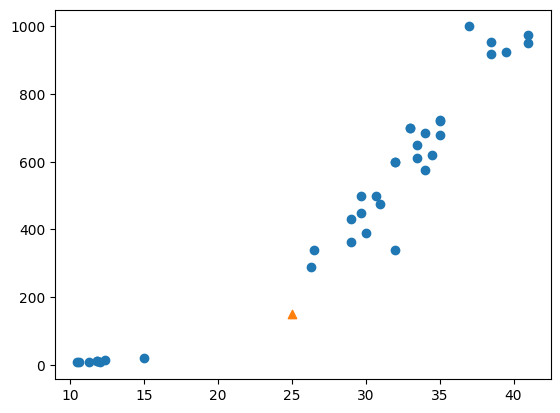

In [54]:
import matplotlib.pyplot as plt 

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^') # marker 로 ^ 표시로 바꾸기

In [56]:
kn.kneighbors([[25, 150]]) # 가까이 있는 인덱스 번호와 거리를 분석해서 알려줌

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[130.48375378, 137.17988191, 140.00603558, 140.62090883,
         140.72046759]]),
 array([[30, 35,  6, 19, 25]]))

In [64]:
mean = train_input.mean()
std = train_input.std()
print(mean , std)

Length2     28.591667
Weight     493.172222
dtype: float64 Length2      9.700144
Weight     321.150445
dtype: float64


In [68]:
train_scaled = (train_input - mean) / std # 표준편차구하기

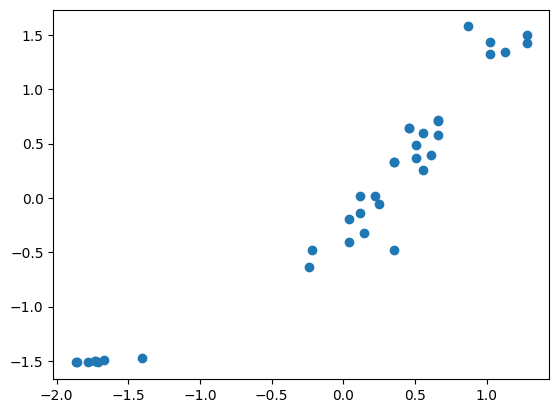

In [71]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight']) # x축과 y축의 간격이 똑같아짐 

In [73]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [78]:
test_scaled = (test_input - mean) / std # 표준점수로 만들어야 함 왜냐면 위에서 표준점수로 다 테스트했으니깐..

In [79]:
kn.score(test_scaled, test_target)

1.0

In [81]:
new = ([25, 150] - mean) / std
new

Length2   -0.370269
Weight    -1.068572
dtype: float64

In [10]:
kn.predict([new])

NameError: name 'kn' is not defined

# 펭귄 
- Adelie, Gentoo 구분하기

In [197]:

import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [241]:
cond = df['species'].isin(['Adelie', 'Gentoo']) # 아델리랑 겐투 펭귄만 가져옴
# df_data = df.loc[cond, ['flipper_length_mm', 'body_mass_g']]# 두 종의 몸무게랑 날개 길이만 가져옴 # df_data = 입력데이터, x축
# df_data = df_data.fillna(df_data.mean())
# 결측치를 무시하고 데이터를 처리했더니 입력값에 결측치가 들어가면 안된다고 오류가 나옴
# 그래서 결측치를 data의 평균으로 채워줌
# 만약 결측치를 버리고 (dropna)를 한다면 입력값(x)와 결과값(y)가 다르게 나와서 오류가 남
df_data1 = df.loc[df['species'] == 'Adelie', ['flipper_length_mm', 'body_mass_g']]
df_data1 = df_data1.fillna(df_data1.mean())


df_data2 = df.loc[df['species'] == 'Gentoo', ['flipper_length_mm', 'body_mass_g']]
df_data2 = df_data2.fillna(df_data2.mean())

df_data = pd.concat([df_data1, df_data2])
                           
df_target = df.loc[cond, 'species'] # df_target = 정답 데이터, 두 종의 종만 가져옴
df_data

,flipper_length_mm,body_mass_g
0,181.000000,3750.000000
1,186.000000,3800.000000
2,195.000000,3250.000000
3,189.953642,3700.662252
4,193.000000,3450.000000
...,...,...
339,217.186992,5076.016260
340,215.000000,4850.000000
341,222.000000,5750.000000
342,212.000000,5200.000000


In [233]:
from sklearn.model_selection import train_test_split

In [234]:
# 내부적으로 데이터를 랜덤하게 섞은 후,
# df_data → train_input, test_input으로 나눔
# df_target → train_target, test_target으로 나눔

In [235]:
train_input, test_input, train_target, test_target = \
train_test_split(df_data, df_target)

In [236]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()



In [237]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [238]:
kn.score(test_input, test_target)

0.9420289855072463

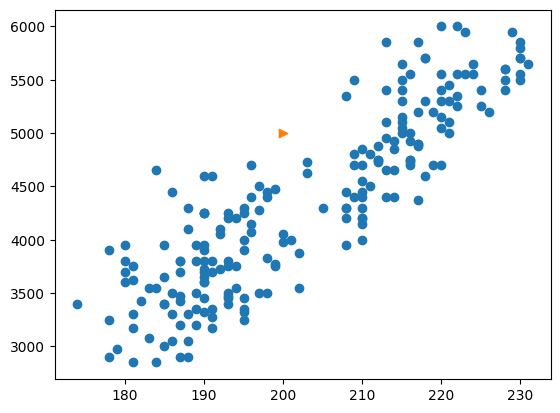

In [239]:
import matplotlib.pyplot as plt 

plt.scatter(train_input['flipper_length_mm'], train_input['body_mass_g'])
plt.scatter(200, 5000, marker='>') # marker 로 > 표시로 바꾸기

In [240]:
kn.predict([[200, 5000]])

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)

# 펭귄 

In [3]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
# df = df.dropna()
df.dropna(inplace= True)

In [10]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [14]:
cond = df['species'].isin(['Adelie', ' Gentoo'])
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
pg_data

,bill_depth_mm,body_mass_g
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
4,19.3,3450.0
5,20.6,3650.0
...,...,...
147,18.4,3475.0
148,17.8,3450.0
149,18.1,3750.0
150,17.1,3700.0


In [16]:
pg_target = df.loc[cond, ['species']]